# Week 4 Individual Assignment
Name: Jiaming Zhu
Description: The purposes of this assignment are improve my week2 assignment and clean up the coding structure. The name of this dataset is Major Safety Events, it contains major safety and security events from 2014 to 2023. I want to continue to explore this dataset and plot the data distribution based on year and mode type in Los Angeles area. It will use the code that I learned from week 3 and week 4. 

## Importing Data
Importing libraries and dataset, check the data information

In [1]:
# importing python libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

In [3]:
# read and add shapefile to notebook
file = gpd.read_file('Data_Week4/Major_Safety_Events.csv')
file

,NTD ID,Agency,Primary UZA UACE Code,Rail/Bus/Ferry,Mode Name,Mode,Type of Service,Fixed Route Flag,Year,Event Description,...,Occupant of Other Vehicle Serious Injuries,Other Injuries,Other Serious Injuries,Suicide Injuries,Suicide Serious Injuries,Total Serious Injuries,Person List,United States,US Counties,geometry
0,90154,Los Angeles County Metropolitan Transportation...,51445,Rail,Light Rail,LR,DO,TRUE,2023,{Redacted} {Redacted} investigation revealed t...,...,0,0,0,0,0,0,,6,2090,None
1,90154,Los Angeles County Metropolitan Transportation...,51445,Bus,Bus,MB,DO,TRUE,2023,Bus operator hit the brakes hard to avoid a ve...,...,0,0,0,0,0,0,I Passenger Senior Citizen (61 and up) F ; ...,6,2090,None
2,90154,Los Angeles County Metropolitan Transportation...,51445,Bus,Bus,MB,DO,TRUE,2022,Suspect assaulted victim while riding the bus ...,...,0,0,0,0,0,0,I Passenger Adult (19 to 60) M,6,2090,None
3,90154,Los Angeles County Metropolitan Transportation...,51445,Rail,Light Rail,LR,DO,TRUE,2022,{Redacted} was attacked by suspect while ridin...,...,0,0,0,0,0,0,I Passenger Adult (19 to 60) M Y,6,2090,None
4,90154,Los Angeles County Metropolitan Transportation...,51445,Rail,Light Rail,LR,DO,TRUE,2022,{Redacted} was attacked by suspect while ridin...,...,0,0,0,0,0,0,I Passenger Adult (19 to 60) M Y,6,2090,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2249,90154,Los Angeles County Metropolitan Transportation...,51445,Rail,Light Rail,LR,DO,TRUE,2014,{Redacted} was standing on the south side of t...,...,0,0,0,0,0,0,I Wait Leave Adult (19 to 60) M,,,None
2250,90154,Los Angeles County Metropolitan Transportation...,51445,Bus,Bus,MB,DO,TRUE,2014,The victim was riding her bicycle by the {Reda...,...,0,0,0,0,0,0,I Wait Leave Teen (13 to 18) F,,,None
2251,90154,Los Angeles County Metropolitan Transportation...,51445,Bus,Bus,MB,DO,TRUE,2014,{Redacted} ( Bus ) EB # {Redacted} lane of {Re...,...,0,0,0,0,0,0,I Passenger Adult (19 to 60) F ; I Passe...,,,None
2252,90154,Los Angeles County Metropolitan Transportation...,51445,Rail,Light Rail,LR,DO,TRUE,2014,A {Redacted} ) was at {Redacted} {Redacted} tr...,...,0,0,0,0,0,0,I Wait Leave Adult (19 to 60) F,,,None


In [4]:
# show data type for each column
file.dtypes

NTD ID                      object
Agency                      object
Primary UZA UACE Code       object
Rail/Bus/Ferry              object
Mode Name                   object
                            ...   
Total Serious Injuries      object
Person List                 object
United States               object
US Counties                 object
geometry                  geometry
Length: 110, dtype: object

In [5]:
# dataset info
file.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2254 entries, 0 to 2253
Columns: 110 entries, NTD ID to geometry
dtypes: geometry(1), object(109)
memory usage: 1.9+ MB


## Plot Histogram
After importing and checking the dataset, I want to plot the number of safety events happened based on mode type.

In [6]:
# count the number of major safety events for each mode type
file['Mode Name'].value_counts()

Mode Name
Bus                  1252
Light Rail            783
Heavy Rail            186
Bus Rapid Transit      29
Vanpool                 4
Name: count, dtype: int64

In [7]:
# save it as a variable
line_count = file['Mode Name'].value_counts()
line_count

Mode Name
Bus                  1252
Light Rail            783
Heavy Rail            186
Bus Rapid Transit      29
Vanpool                 4
Name: count, dtype: int64

In [8]:
# convert the series into a dataframe
line_count = line_count.reset_index()
line_count

,Mode Name,count
0,Bus,1252
1,Light Rail,783
2,Heavy Rail,186
3,Bus Rapid Transit,29
4,Vanpool,4


In [9]:
# rename columns
line_count.columns = ['Mode Type', 'Number of Major Events']
line_count

,Mode Type,Number of Major Events
0,Bus,1252
1,Light Rail,783
2,Heavy Rail,186
3,Bus Rapid Transit,29
4,Vanpool,4


<Axes: title={'center': 'Number of Major Safety Events for Each Mode Type'}, xlabel='Mode Type'>

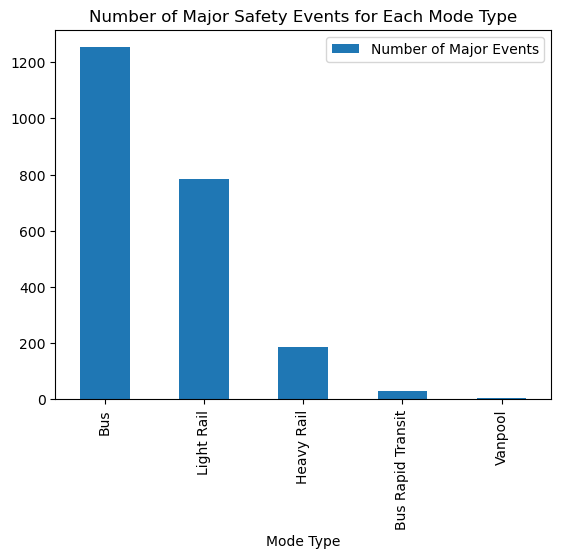

In [10]:
# plot the number of major events for each mode type
line_count.plot.bar(x = 'Mode Type', y = 'Number of Major Events', title = 'Number of Major Safety Events for Each Mode Type')

In this plot we can see that Bus has the most number of accidents and Vanpool has the least.

## Trimming Data
Trimming the dataset, only keep the columns that I want to use.

In [19]:
# list of desired column names
desired_columns =['Mode Name','Mode','Year','Event Type','Latitude','Longitude','LatLon']

In [20]:
# trimming the dataset
data_trimmed = file[desired_columns].copy()
data_trimmed

,Mode Name,Mode,Year,Event Type,Latitude,Longitude,LatLon
0,Light Rail,LR,2023,Rail Collision,34.03336,-118.16377,POINT (-118.16377 34.03336)
1,Bus,MB,2023,Other,34.02805,-118.21938,POINT (-118.21938 34.02805)
2,Bus,MB,2022,Assault,33.930941,-118.309252,POINT (-118.309252 33.930941)
3,Light Rail,LR,2022,Assault,33.928945,-118.238038,POINT (-118.238038 33.928945)
4,Light Rail,LR,2022,Assault,34.013961,-118.491508,POINT (-118.491508 34.013961)
...,...,...,...,...,...,...,...
2249,Light Rail,LR,2014,Assault,,,
2250,Bus,MB,2014,Rape,,,
2251,Bus,MB,2014,Non-Rail Collision,,,
2252,Light Rail,LR,2014,Robbery,,,


In [21]:
# show rows that Latitude is not empty
data_trimmed[data_trimmed.Latitude != '']

,Mode Name,Mode,Year,Event Type,Latitude,Longitude,LatLon
0,Light Rail,LR,2023,Rail Collision,34.03336,-118.16377,POINT (-118.16377 34.03336)
1,Bus,MB,2023,Other,34.02805,-118.21938,POINT (-118.21938 34.02805)
2,Bus,MB,2022,Assault,33.930941,-118.309252,POINT (-118.309252 33.930941)
3,Light Rail,LR,2022,Assault,33.928945,-118.238038,POINT (-118.238038 33.928945)
4,Light Rail,LR,2022,Assault,34.013961,-118.491508,POINT (-118.491508 34.013961)
...,...,...,...,...,...,...,...
2020,Light Rail,LR,2015,Rail Collision,34.03998,-118.266814,POINT (-118.266814 34.03998)
2021,Heavy Rail,HR,2015,Attempted Suicide,34.1011194,-118.3258063,POINT (-118.3258063 34.1011194)
2027,Bus,MB,2015,Non-Rail Collision,34.0436431,-118.3089835,POINT (-118.3089835 34.0436431)
2039,Light Rail,LR,2015,Rail Collision,34.03104,-118.264604,POINT (-118.264604 34.03104)


In [22]:
# trimming the dataset
new_data_trimmed = data_trimmed[data_trimmed.Latitude != ''].copy()
new_data_trimmed

,Mode Name,Mode,Year,Event Type,Latitude,Longitude,LatLon
0,Light Rail,LR,2023,Rail Collision,34.03336,-118.16377,POINT (-118.16377 34.03336)
1,Bus,MB,2023,Other,34.02805,-118.21938,POINT (-118.21938 34.02805)
2,Bus,MB,2022,Assault,33.930941,-118.309252,POINT (-118.309252 33.930941)
3,Light Rail,LR,2022,Assault,33.928945,-118.238038,POINT (-118.238038 33.928945)
4,Light Rail,LR,2022,Assault,34.013961,-118.491508,POINT (-118.491508 34.013961)
...,...,...,...,...,...,...,...
2020,Light Rail,LR,2015,Rail Collision,34.03998,-118.266814,POINT (-118.266814 34.03998)
2021,Heavy Rail,HR,2015,Attempted Suicide,34.1011194,-118.3258063,POINT (-118.3258063 34.1011194)
2027,Bus,MB,2015,Non-Rail Collision,34.0436431,-118.3089835,POINT (-118.3089835 34.0436431)
2039,Light Rail,LR,2015,Rail Collision,34.03104,-118.264604,POINT (-118.264604 34.03104)


In [23]:
# check the data type of each columns
data_trimmed.dtypes

Mode Name     object
Mode          object
Year          object
Event Type    object
Latitude      object
Longitude     object
LatLon        object
dtype: object

In [24]:
# covert Latitude and Longitude from object to float
new_data_trimmed['Latitude']= new_data_trimmed.Latitude.astype(float)
new_data_trimmed['Longitude']= new_data_trimmed.Longitude.astype(float)

In [25]:
# convert object to WKT strings
new_data_trimmed['LatLon'] = new_data_trimmed['LatLon'].apply(lambda x: x.wkt if hasattr(x, 'wkt') else x)

In [26]:
# convert object to geometry for column LatLon
from shapely.geometry import Point
from shapely import wkt
new_data_trimmed['geometry'] = new_data_trimmed['LatLon'].apply(wkt.loads)
gnew_data_trimmed = gpd.GeoDataFrame(new_data_trimmed, geometry='geometry')

In [27]:
# check data type of each column again
gnew_data_trimmed.dtypes

Mode Name       object
Mode            object
Year            object
Event Type      object
Latitude       float64
Longitude      float64
LatLon          object
geometry      geometry
dtype: object

## Plot Data Geometry
Plot data on map

In [28]:
# output the data's projection
gnew_data_trimmed.crs

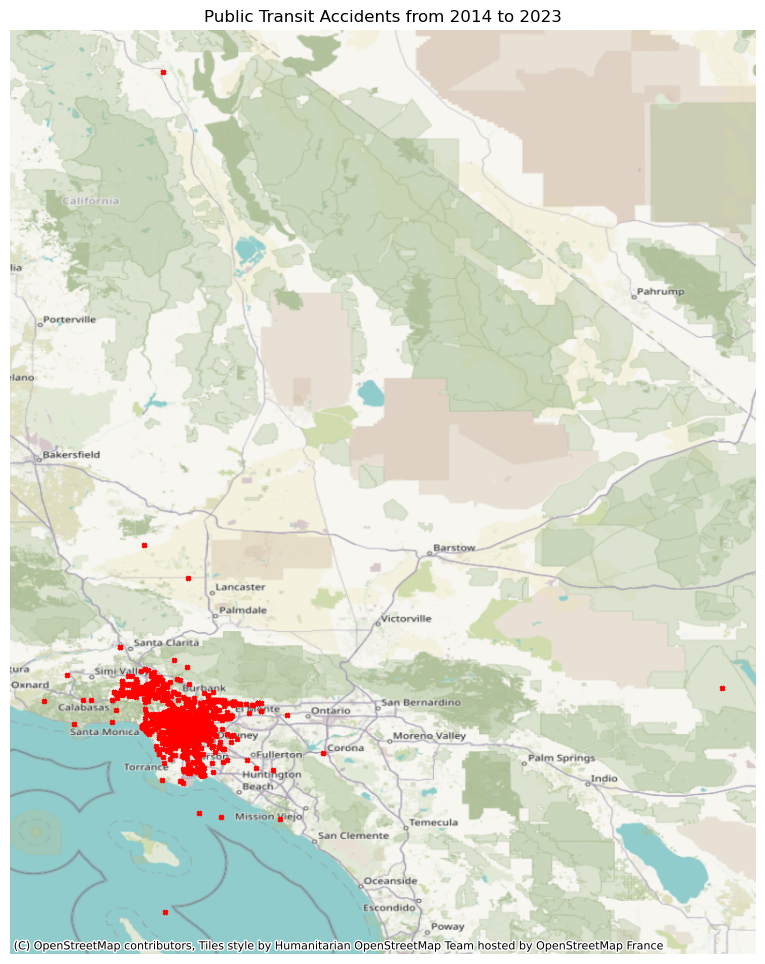

In [31]:
# start the plot
fig, ax = plt.subplots(figsize=(12,12))

# add the data options
gnew_data_trimmed.plot(ax=ax, 
        marker='X',
        markersize=10,
        color='red')

# turn the axes off
ax.axis('off')

# give it a title
ax.set_title('Public Transit Accidents from 2014 to 2023')

# add a basemap
ctx.add_basemap(ax, crs=4326) 

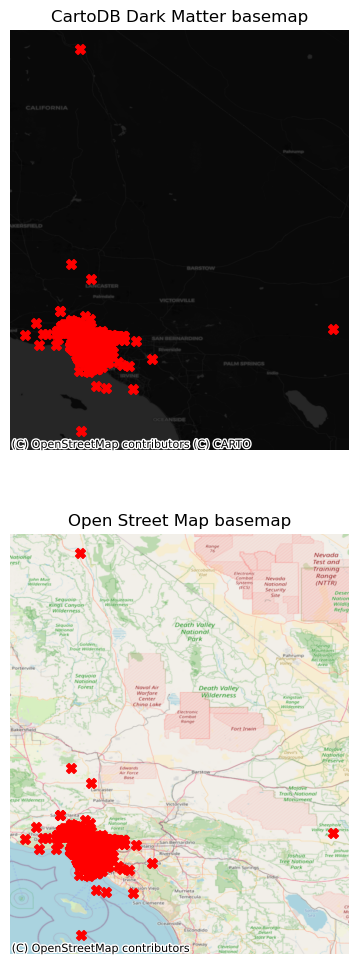

In [33]:
# try different basemap
fig, ax = plt.subplots(2,1,figsize=(20,12))

# first map
gnew_data_trimmed.plot(ax=ax[0], 
                      marker='X',
                      markersize=50,
                      color='red')

ax[0].axis('off')
ax[0].set_title('CartoDB Dark Matter basemap')

ctx.add_basemap(ax[0], source=ctx.providers.CartoDB.DarkMatter,crs=4326)

# second map
gnew_data_trimmed.plot(ax=ax[1], 
                      marker='X',
                      markersize=50,
                      color='red')

ax[1].axis('off')
ax[1].set_title('Open Street Map basemap')

ctx.add_basemap(ax[1], source=ctx.providers.OpenStreetMap.Mapnik,crs=4326)

## Plot Data Based on Year
Plot the accidents happened based on each year, using loop.

In [34]:
# create a list of routes
years = ["2014","2015", "2016","2017","2018","2019","2020","2021","2022","2023"]

/tmp/ipykernel_216/4292776653.py:7: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  gnew_data_trimmed[gnew_data_trimmed.Year == Year].plot(ax=ax,


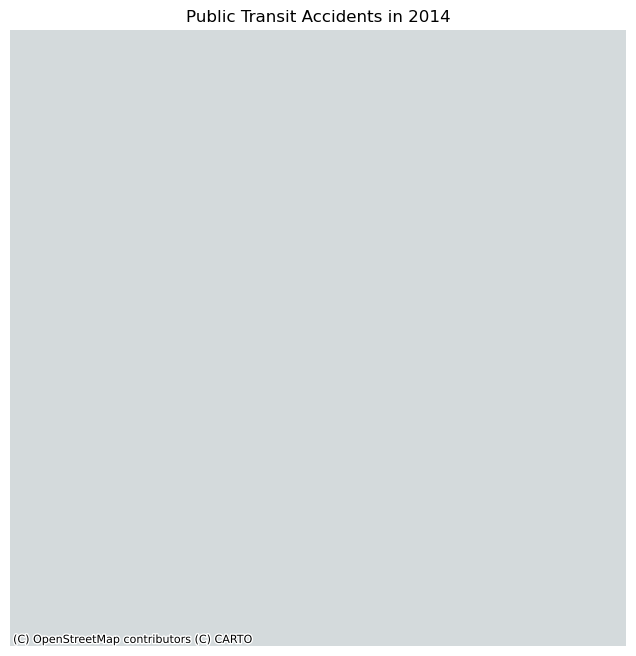

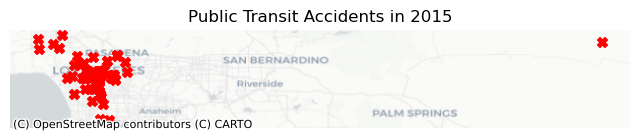

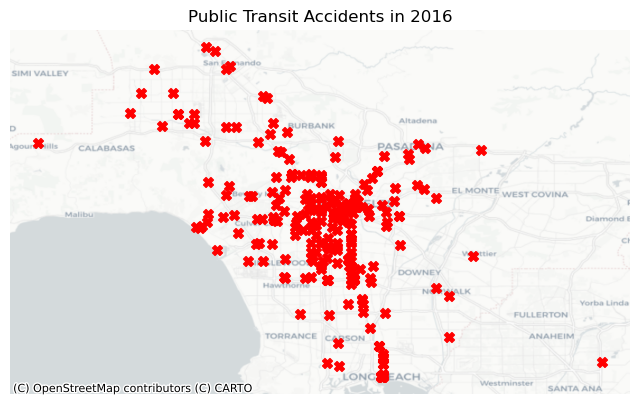

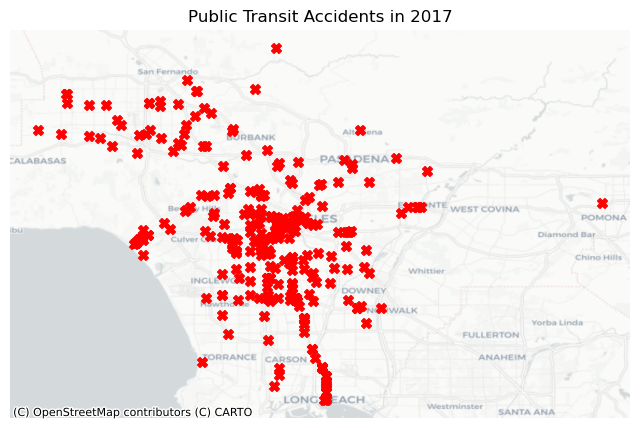

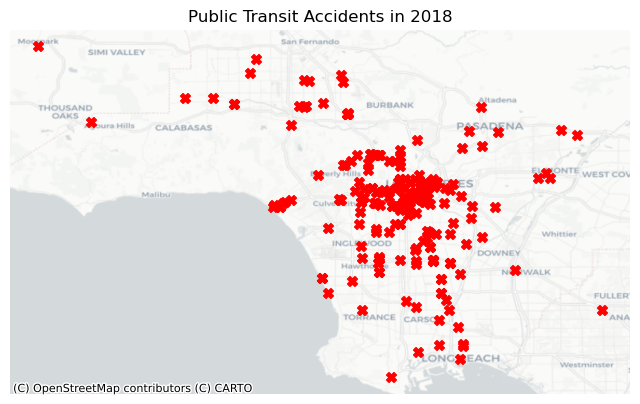

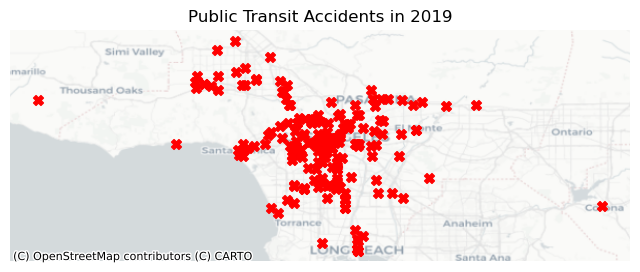

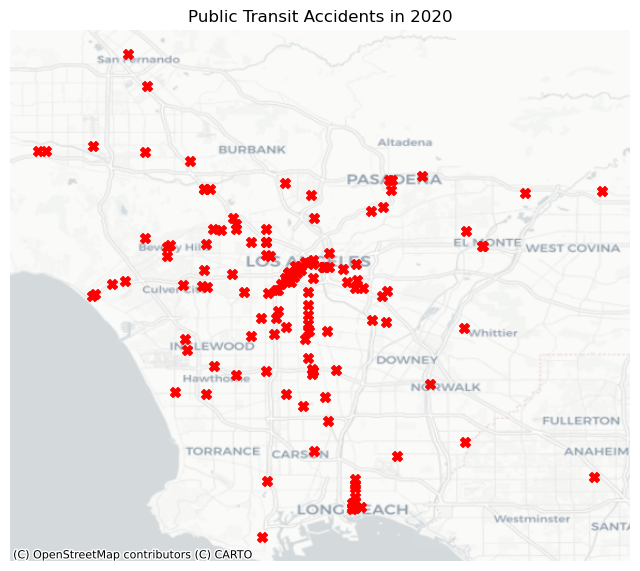

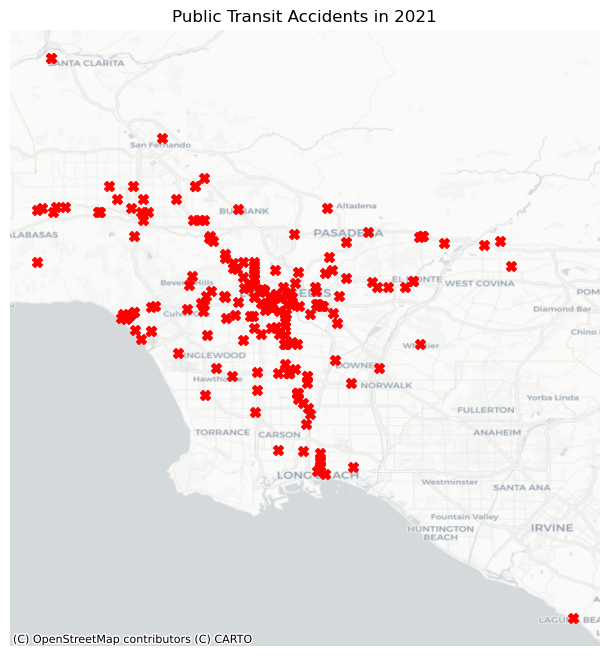

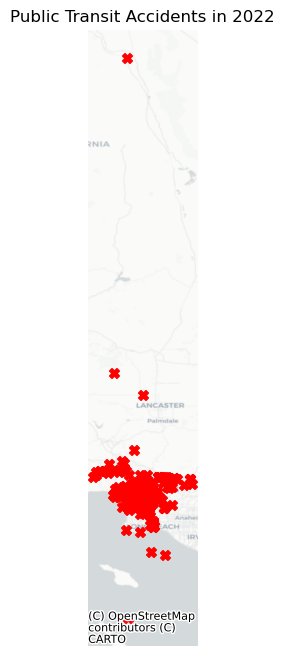

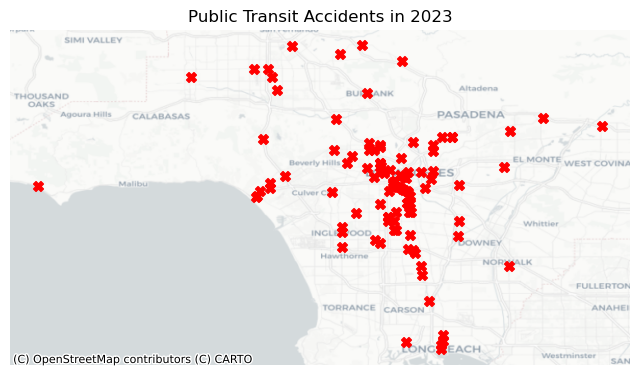

In [35]:
# loop through year
for Year in years:

    # map it
    fig, ax = plt.subplots(figsize=(8,8))

    gnew_data_trimmed[gnew_data_trimmed.Year == Year].plot(ax=ax, 
                          marker='X',
                          markersize=50,
                          color='red')

    # no axes
    ax.axis('off')

    # title
    ax.set_title('Public Transit Accidents in '+str(Year))

    #basemap
    ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, crs=4326)

For some reason, the accidents happened in 2014 did not display. After checking the dataset, I found the reason is that the geometry information in 2014 is empty, so we trimmed these empty data in previous code.

## Plot Bar Chart

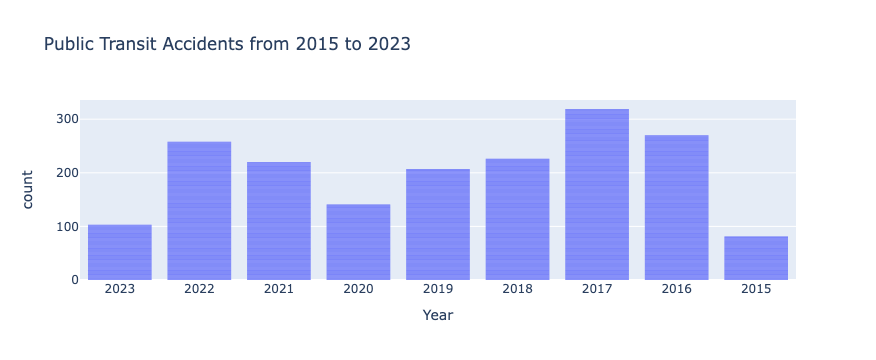

In [39]:
import plotly.express as px
from sodapy import Socrata

# plot a simple bar chart
fig = px.bar(gnew_data_trimmed,
       x='Year',
       title='Public Transit Accidents from 2015 to 2023'
      )

# get rid of white lines inside the bars
fig.update_traces(marker_line_width=0)

# show the figure
fig.show()

In [41]:
# the distribution of accident mode types per year
year_mode = gnew_data_trimmed.value_counts(['Year','Mode Name']).reset_index(name='count')
year_mode

,Year,Mode Name,count
0,2017,Bus,182
1,2016,Bus,151
2,2022,Bus,136
3,2018,Bus,112
4,2017,Light Rail,112
5,2019,Bus,110
6,2022,Light Rail,100
7,2021,Bus,100
8,2016,Light Rail,95
9,2021,Light Rail,88


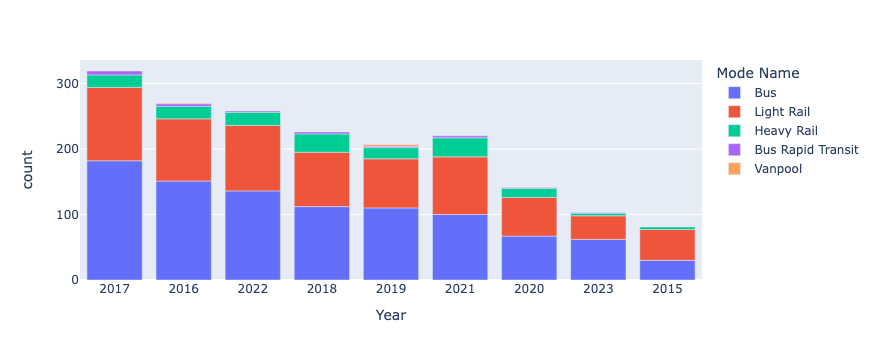

In [42]:
# make a stacked bar chart
fig = px.bar(year_mode,
       x='Year',
       y='count',
       color='Mode Name' 
)

fig.show()

The bar chart looks good, but the year did not display in order. Try to display it in order next time.

## Plotly Map
Plot data in interactive map

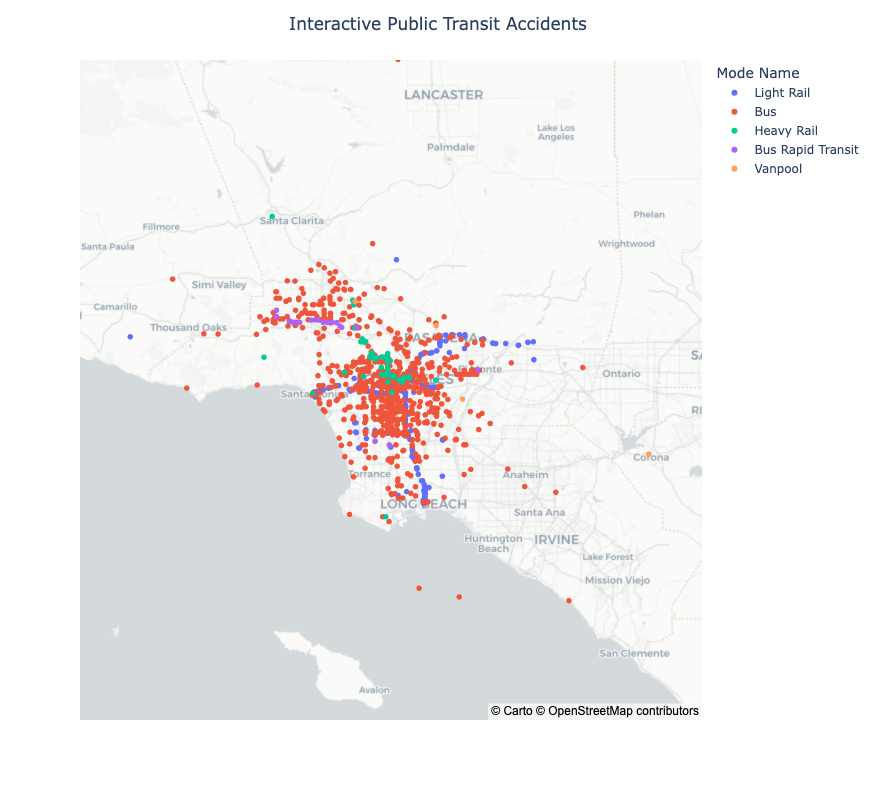

In [54]:
fig = px.scatter_mapbox(gnew_data_trimmed, 
                        lat="Latitude", 
                        lon="Longitude", 
                        color="Mode Name",
                        labels={'Year':'Mode Name'},
                        mapbox_style="carto-positron"
                       )

# options on the layout
fig.update_layout(
    width = 800,
    height = 800,
    title = "Interactive Public Transit Accidents",
    title_x=0.5 # aligns title to center
)


fig.show()